# <div align="center">Machine Learning: 21 Blackjack</div>

<div style="text-align: center;">
  <img src="./imagenes_y_recursos/portada.jpg" width="800" height="450" style="object-fit: cover;" />
</div>

*Jorge Alonso Conde - Trabajo final Machine Learning*

# Importación del data set #

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
ds_blackjack = pd.read_csv("./data/blkjckhands.csv", nrows=100002) #menos registros

In [84]:
ds_blackjack.tail(20)

Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
99982            4  Player5     10      7      0      0      0          17   
99983            5  Player6      2     10      0     10      0          22   
99984            0  Player1     10     10      0      0      0          20   
99985            1  Player2     10      6      0      0      0          16   
99986            2  Player3      7      5      0      1      0          13   
99987            3  Player4     10      6      0      0      0          16   
99988            4  Player5      2      2      5      1      1          11   
99989            5  Player6      2      4      8      0      0          14   
99990            0  Player1      5     10      0      0      0          15   
99991            1  Player2      4      9      0      0      0          13   
99992            2  Player3     10     10      0      0      0          20   
99993            3  Player4     10      7      0      0      0          17   
99994            4  Player5      5      8      0      0      0          13   
99995            5  Player6      2      1     10      0      0          13   
99996            0  Player1      8     10      0      0      0          18   
99997            1  Player2      2      8      6     10      0          26   
99998            2  Player3      1      5     10      6      0          22   
99999            3  Player4     10     10      0      0      0          20   
100000           4  Player5      8     11      0      0      0          19   
100001           5  Player6     10     10      0      0      0          20   

        dealcard1  dealcard2  ...  dealcard4  dealcard5  sumofdeal  blkjck  \
99982           3          6  ...          0          0         17   nowin   
99983           3          6  ...          0          0         17   nowin   
99984           3          5  ...          0          0         18   nowin   
99985           3          5  ...          0          0         18   nowin   
99986           3          5  ...          0          0         18   nowin   
99987           3          5  ...          0          0         18   nowin   
99988           3          5  ...          0          0         18   nowin   
99989           3          5  ...          0          0         18   nowin   
99990           3          8  ...          0          0         21   nowin   
99991           3          8  ...          0          0         21   nowin   
99992           3          8  ...          0          0         21   nowin   
99993           3          8  ...          0          0         21   nowin   
99994           3          8  ...          0          0         21   nowin   
99995           3          8  ...          0          0         21   nowin   
99996           9          8  ...          0          0         17   nowin   
99997           9          8  ...          0          0         17   nowin   
99998           9          8  ...          0          0         17   nowin   
99999           9          8  ...          0          0         17   nowin   
100000          9          8  ...          0          0         17   nowin   
100001          9          8  ...          0          0         17   nowin   

       winloss plybustbeat dlbustbeat plwinamt  dlwinamt  ply2cardsum  
99982     Push        Push       Push       10         0           17  
99983     Loss        Bust     PlBust        0        10           12  
99984      Win       Plwin       Beat       20         0           20  
99985     Loss        Beat      Dlwin        0        10           16  
99986     Loss        Beat      Dlwin        0        10           12  
99987     Loss        Beat      Dlwin        0        10           16  
99988     Loss        Beat      Dlwin        0        10            4  
99989     Loss        Beat      Dlwin        0        10            6  
99990     Loss        Beat      Dlwin        0        10           15  
99991     

# Estudio del Data Set #

#### Este estudio se centra en cómo juegan los jugadores y en mejorar la toma de decisiones durante la partida. Por lo tanto, se eliminarán las columnas que hacen referencia a las apuestas, ya que no son necesarias para este análisis. ####

In [85]:
ds_blackjack.head()

Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
0           0  Player1      7     10      0      0      0          17   
1           1  Player2     10      9      0      0      0          19   
2           2  Player3      9      8      0      0      0          17   
3           3  Player4      2     10      0      5      0          17   
4           4  Player5     10      2      0      5      0          17   

   dealcard1  dealcard2  ...  dealcard4  dealcard5  sumofdeal  blkjck winloss  \
0         10          8  ...          0          0         18   nowin    Loss   
1         10          8  ...          0          0         18   nowin     Win   
2         10          8  ...          0          0         18   nowin    Loss   
3         10          8  ...          0          0         18   nowin    Loss   
4         10          8  ...          0          0         18   nowin    Loss   

  plybustbeat dlbustbeat plwinamt  dlwinamt  ply2cardsum  
0        Beat      Dlwin        0        10           17  
1       Plwin       Beat       20         0           19  
2        Beat      Dlwin        0        10           17  
3        Beat      Dlwin        0        10           12  
4        Beat      Dlwin        0        10           12  

[5 rows x 21 columns]

In [86]:
ds_blackjack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   100002 non-null  int64 
 1   PlayerNo     100002 non-null  object
 2   card1        100002 non-null  int64 
 3   card2        100002 non-null  int64 
 4   card3        100002 non-null  int64 
 5   card4        100002 non-null  int64 
 6   card5        100002 non-null  int64 
 7   sumofcards   100002 non-null  int64 
 8   dealcard1    100002 non-null  int64 
 9   dealcard2    100002 non-null  int64 
 10  dealcard3    100002 non-null  int64 
 11  dealcard4    100002 non-null  int64 
 12  dealcard5    100002 non-null  int64 
 13  sumofdeal    100002 non-null  int64 
 14  blkjck       100002 non-null  object
 15  winloss      100002 non-null  object
 16  plybustbeat  100002 non-null  object
 17  dlbustbeat   100002 non-null  object
 18  plwinamt     100002 non-null  int64 
 19  dl

In [87]:
ds_blackjack.describe()

Unnamed: 0          card1          card2          card3  \
count  100002.000000  100002.000000  100002.000000  100002.000000   
mean        2.500000       7.138217       7.074569       1.953791   
std         1.707834       2.999448       3.013738       3.531774   
min         0.000000       1.000000       1.000000       0.000000   
25%         1.000000       5.000000       4.000000       0.000000   
50%         2.500000       8.000000       8.000000       0.000000   
75%         4.000000      10.000000      10.000000       2.000000   
max         5.000000      11.000000      11.000000      11.000000   

               card4          card5     sumofcards      dealcard1  \
count  100002.000000  100002.000000  100002.000000  100002.000000   
mean        2.346333       0.396602      18.909512       7.213716   
std         3.655032       1.746872       3.216796       2.967476   
min         0.000000       0.000000       9.000000       1.000000   
25%         0.000000       0.000000      17.000000       5.000000   
50%         0.000000       0.000000      19.000000       8.000000   
75%         4.000000       0.000000      21.000000      10.000000   
max        10.000000      10.000000      26.000000      11.000000   

           dealcard2      dealcard3      dealcard4      dealcard5  \
count  100002.000000  100002.000000  100002.000000  100002.000000   
mean        7.136197       4.371993       1.390652       0.225895   
std         2.991461       4.080668       3.054700       1.324995   
min         1.000000       0.000000       0.000000       0.000000   
25%         5.000000       0.000000       0.000000       0.000000   
50%         8.000000       4.000000       0.000000       0.000000   
75%        10.000000       9.000000       0.000000       0.000000   
max        11.000000      11.000000      10.000000      10.000000   

           sumofdeal       plwinamt       dlwinamt    ply2cardsum  
count  100002.000000  100002.000000  100002.000000  100002.000000  
mean       20.338453       9.812554       4.732905      14.212786  
std         2.566882       9.793781       4.992886       4.428751  
min        10.000000       0.000000       0.000000       2.000000  
25%        18.000000       0.000000       0.000000      12.000000  
50%        20.000000      10.000000       0.000000      14.000000  
75%        22.000000      20.000000      10.000000      18.000000  
max        26.000000      25.000000      10.000000      21.000000

### Data set: variables y descripción

| Variable         | Traducción                        | Significado                                                                 |
|------------------|------------------------------------|------------------------------------------------------------------------------|
| `Unnamed: 0`     | Índice                             | Número de fila del dataset (índice automático del archivo CSV)              |
| `PlayerNo`       | Jugador N.º                        | Identificador del jugador (cadena de texto)                                 |
| `card1`          | Carta 1                            | Primera carta recibida por el jugador                                       |
| `card2`          | Carta 2                            | Segunda carta recibida por el jugador                                       |
| `card3`          | Carta 3                            | Tercera carta del jugador (si pide carta)                                   |
| `card4`          | Carta 4                            | Cuarta carta del jugador (si sigue pidiendo)                                |
| `card5`          | Carta 5                            | Quinta carta del jugador (última posible carta recibida)                    |
| `sumofcards`     | Suma de cartas jugador             | Suma total de las cartas del jugador                                        |
| `dealcard1`      | Carta crupier 1                    | Primera carta visible del crupier                                           |
| `dealcard2`      | Carta crupier 2                    | Segunda carta del crupier                                                   |
| `dealcard3`      | Carta crupier 3                    | Tercera carta del crupier (si pide carta)                                   |
| `dealcard4`      | Carta crupier 4                    | Cuarta carta del crupier (si sigue pidiendo)                                |
| `dealcard5`      | Carta crupier 5                    | Quinta carta del crupier (última posible)                                   |
| `sumofdeal`      | Suma de cartas crupier             | Suma total de las cartas del crupier                                        |
| `blkjck`         | Blackjack                          | Indica si hubo blackjack natural (21 con las dos primeras cartas)           |
| `winloss`        | Resultado                          | Resultado de la mano para el jugador (`Win`, `Loss`, `Push`)          |
| `plybustbeat`    | Jugador se pasó                    | Resultado de la partida para el jugador: Beat, DlBust, Plwin, Bust, Push                      |
| `dlbustbeat`     | Crupier se pasó                    | Resultado de la partida para el dealer: Dlwin, Bust, Beat, PlBust, Push                   |
| `ply2cardsum`    | Suma 2 primeras cartas jugador     | Suma de las primeras dos cartas del jugador                                 |



In [88]:
ds_blackjack["winloss"].value_counts()

winloss
Loss    47330
Win     43343
Push     9329
Name: count, dtype: int64

In [89]:
ds_blackjack["plybustbeat"].value_counts()

#Beat	= El jugador gana con una mano superior sin que nadie se pase de 21.
#DlBust	= El jugador gana porque el crupier se pasó de 21.
#Plwin	= El jugador gana con un blackjack natural (As + 10).
#Bust	= El jugador pierde porque se pasó de 21.
#Push	= Empate: el jugador y el crupier tienen el mismo total.

plybustbeat
Beat      29396
DlBust    24784
Plwin     18559
Bust      17934
Push       9329
Name: count, dtype: int64

In [90]:
ds_blackjack["dlbustbeat"].value_counts()

#Dlwin	El crupier gana con una mano superior sin que nadie se pase de 21.
#Bust	El crupier pierde porque se pasó de 21.
#Beat	El crupier gana porque el jugador se pasó de 21.
#PlBust	El jugador pierde por pasarse, lo que implica victoria para el crupier.
#Push	Empate: el crupier y el jugador tienen el mismo total.

dlbustbeat
Dlwin     29396
Bust      24784
Beat      18559
PlBust    17934
Push       9329
Name: count, dtype: int64

In [91]:
ds_blackjack["winloss"].value_counts()

winloss
Loss    47330
Win     43343
Push     9329
Name: count, dtype: int64

# Limpieza y trasformación del Data Frame #

In [92]:
#Eliminamos columnas referente a apuestas

ds_blackjack = ds_blackjack.drop(["plwinamt", "dlwinamt"], axis=1)



In [93]:
# Suma dos primeras cartas del jugador
ds_blackjack = ds_blackjack.rename(columns= {"player_2cards_sum": "ply2cardsum"})

In [94]:
# número de cartas totales pedidas por el jugador (cuenta en una única fila, el numero de cartas que ha pedido el jugador)

ds_blackjack["ply_No_cards"] = ds_blackjack[["card1", "card2", "card3", "card4", "card5"]].ne(0).sum(axis=1) #.e(0) quiere decir not equal 0

# número de cartas totales pedidas por el dealer (cuenta en una única fila, el numero de cartas que ha pedido el dealer)

ds_blackjack["deal_No_cards"] = ds_blackjack[["dealcard1", "dealcard2", "dealcard3", "dealcard4", "dealcard5"]].ne(0).sum(axis=1)

In [95]:
# Suma total de cartas visibles en la mesa al empezar la partida (player vs crepier)

ds_blackjack["deal_2cards_sum"] = ds_blackjack[["dealcard1", "dealcard2"]].sum(axis=1)

In [96]:
# Suma total de cartas visibles en la mesa al empezar la partida (player vs crepier)

ds_blackjack["sum_3first_cards"] = ds_blackjack[["card1", "card2", "dealcard1"]].sum(axis=1)



Pasamos la variable winloss a numérica:

In [97]:
#trasformar las variables categoricas en numericas, la mas importante win, los, push

def  numeric_def (x):
    if x == "Loss":
        return 0
    if x == "Push":
        return 1
    if x == "Win":
        return 2
    

ds_blackjack["winloss_numeric"] = ds_blackjack["winloss"].apply(numeric_def)


Tabla de variable:

| Valor original | Significado          | Valor asignado |
| -------------- | -------------------- | -------------- |
| **Loss**       | Derrota del jugador  | 0              |
| **Push**       | Empate               | 1              |
| **Win**        | Victoria del jugador | 2              |

Pasamos la variable blkjck a numérica:

In [98]:
#Cambiamos la columna blkjck a numerica (esta categorica indica si el jugador tiene un 21 únicamente con dos cartas)

print(ds_blackjack["blkjck"].describe())
print("----")
print(ds_blackjack["blkjck"].value_counts())

count     100002
unique         2
top        nowin
freq       95253
Name: blkjck, dtype: object
----
blkjck
nowin    95253
Win       4749
Name: count, dtype: int64


In [99]:
# Creamos la función y la aplicamos en un nueva columna

def blkjck_def (x):
    if x == "nowin":
        return 0
    if x == "Win":
        return 1
    
ds_blackjack["blkjck_numeric"] = ds_blackjack["blkjck"].apply(blkjck_def)

Tabla de variable:

| Valor original | Significado                        | Valor asignado |
| -------------- | ---------------------------------- | -------------- |
| **nowin**      | No se ganó por blackjack           | 0              |
| **Win**        | Victoria del jugador por blackjack | 1              |


Pasamos la variable plybustbeat a numerica:

In [100]:
#Entendemos como se compora la columna plybustbeat

print(ds_blackjack["plybustbeat"].describe())
print("----")
print(ds_blackjack["plybustbeat"].value_counts())

count     100002
unique         5
top         Beat
freq       29396
Name: plybustbeat, dtype: object
----
plybustbeat
Beat      29396
DlBust    24784
Plwin     18559
Bust      17934
Push       9329
Name: count, dtype: int64


In [101]:
# Creamos la columna en formato numerica

def plybustbeat_def (x):
    if x == "Push":
        return 0
    if x == "Plwin":
        return 1
    if x == "DlBust":
        return 2
    if x == "Beat":
        return 3
    if x == "Bust":
        return 4
    
ds_blackjack["plybustbeat_numeric"] = ds_blackjack["plybustbeat"].apply(plybustbeat_def)

Tabla de variable:

| Valor original | Significado                      | Valor asignado |
| -------------- | -------------------------------- | -------------- |
| **Push**       | Empate                           | 0              |
| **Plwin**      | Gana el jugador (mejor mano)     | 1              |
| **DlBust**     | Gana el jugador (dealer se pasa) | 2              |
| **Beat**       | Gana el dealer (mejor mano)      | 3              |
| **Bust**       | Pierde el jugador (se pasa)      | 4              |

In [102]:
ds_blackjack.head(20)

Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
0            0  Player1      7     10      0      0      0          17   
1            1  Player2     10      9      0      0      0          19   
2            2  Player3      9      8      0      0      0          17   
3            3  Player4      2     10      0      5      0          17   
4            4  Player5     10      2      0      5      0          17   
5            5  Player6      6      1      8     10      0          25   
6            0  Player1     10      4      0      0      0          14   
7            1  Player2      3     10      0      0      0          13   
8            2  Player3     10      2      0      0      0          12   
9            3  Player4      9      6      0      0      0          15   
10           4  Player5     10      4      0      0      0          14   
11           5  Player6      3      5      2      4      0          14   
12           0  Player1     10      2      0      0      0          12   
13           1  Player2      9     10      0      0      0          19   
14           2  Player3      5      1     10      0      0          16   
15           3  Player4     10     10      0      0      0          20   
16           4  Player5      2      9      1      0      0          12   
17           5  Player6      9      5      0      0      0          14   
18           0  Player1     10      4      0      5      0          19   
19           1  Player2      2     10      0      5      0          17   

    dealcard1  dealcard2  ...  plybustbeat  dlbustbeat  ply2cardsum  \
0          10          8  ...         Beat       Dlwin           17   
1          10          8  ...        Plwin        Beat           19   
2          10          8  ...         Beat       Dlwin           17   
3          10          8  ...         Beat       Dlwin           12   
4          10          8  ...         Beat       Dlwin           12   
5          10          8  ...         Bust      PlBust            7   
6           4          4  ...       DlBust        Bust           14   
7           4          4  ...       DlBust        Bust           13   
8           4          4  ...       DlBust        Bust           12   
9           4          4  ...       DlBust        Bust           15   
10          4          4  ...       DlBust        Bust           14   
11          4          4  ...       DlBust        Bust            8   
12          4          6  ...       DlBust        Bust           12   
13          4          6  ...       DlBust        Bust           19   
14          4          6  ...       DlBust        Bust            6   
15          4          6  ...       DlBust        Bust           20   
16          4          6  ...       DlBust        Bust           11   
17          4          6  ...       DlBust        Bust           14   
18         10          8  ...        Plwin        Beat           14   
19         10          8  ...         Beat       Dlwin           12   

    ply_No_cards deal_No_cards deal_2cards_sum sum_3first_cards  \
0              2             2              18               27   
1              2             2              18               29   
2              2             2              18               27   
3              3             2              18               22   
4              3             2              18               22   
5              4             2              18               17   
6              2             4               8               18   
7              2             4               8               17   
8              2             4               8               16   
9              2             4               8               19   
10             2             4               8               18   
11             4             4               8               12   
12             2             4              10               16   
13             2   

In [103]:
ds_blackjack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           100002 non-null  int64 
 1   PlayerNo             100002 non-null  object
 2   card1                100002 non-null  int64 
 3   card2                100002 non-null  int64 
 4   card3                100002 non-null  int64 
 5   card4                100002 non-null  int64 
 6   card5                100002 non-null  int64 
 7   sumofcards           100002 non-null  int64 
 8   dealcard1            100002 non-null  int64 
 9   dealcard2            100002 non-null  int64 
 10  dealcard3            100002 non-null  int64 
 11  dealcard4            100002 non-null  int64 
 12  dealcard5            100002 non-null  int64 
 13  sumofdeal            100002 non-null  int64 
 14  blkjck               100002 non-null  object
 15  winloss              100002 non-nu

In [104]:
ds_blackjack.describe()

Unnamed: 0          card1          card2          card3  \
count  100002.000000  100002.000000  100002.000000  100002.000000   
mean        2.500000       7.138217       7.074569       1.953791   
std         1.707834       2.999448       3.013738       3.531774   
min         0.000000       1.000000       1.000000       0.000000   
25%         1.000000       5.000000       4.000000       0.000000   
50%         2.500000       8.000000       8.000000       0.000000   
75%         4.000000      10.000000      10.000000       2.000000   
max         5.000000      11.000000      11.000000      11.000000   

               card4          card5     sumofcards      dealcard1  \
count  100002.000000  100002.000000  100002.000000  100002.000000   
mean        2.346333       0.396602      18.909512       7.213716   
std         3.655032       1.746872       3.216796       2.967476   
min         0.000000       0.000000       9.000000       1.000000   
25%         0.000000       0.000000      17.000000       5.000000   
50%         0.000000       0.000000      19.000000       8.000000   
75%         4.000000       0.000000      21.000000      10.000000   
max        10.000000      10.000000      26.000000      11.000000   

           dealcard2      dealcard3  ...      dealcard5      sumofdeal  \
count  100002.000000  100002.000000  ...  100002.000000  100002.000000   
mean        7.136197       4.371993  ...       0.225895      20.338453   
std         2.991461       4.080668  ...       1.324995       2.566882   
min         1.000000       0.000000  ...       0.000000      10.000000   
25%         5.000000       0.000000  ...       0.000000      18.000000   
50%         8.000000       4.000000  ...       0.000000      20.000000   
75%        10.000000       9.000000  ...       0.000000      22.000000   
max        11.000000      11.000000  ...      10.000000      26.000000   

         ply2cardsum   ply_No_cards  deal_No_cards  deal_2cards_sum  \
count  100002.000000  100002.000000  100002.000000    100002.000000   
mean       14.212786       2.697186       2.894462        14.349913   
std         4.428751       0.764563       0.809565         4.373242   
min         2.000000       2.000000       2.000000         2.000000   
25%        12.000000       2.000000       2.000000        12.000000   
50%        14.000000       3.000000       3.000000        14.000000   
75%        18.000000       3.000000       3.000000        18.000000   
max        21.000000       5.000000       5.000000        21.000000   

       sum_3first_cards  winloss_numeric  blkjck_numeric  plybustbeat_numeric  
count     100002.000000    100002.000000   100002.000000        100002.000000  
mean          21.426501         0.960131        0.047489             2.280464  
std            5.321041         0.951384        0.212684             1.221226  
min            3.000000         0.000000        0.000000             0.000000  
25%           18.000000         0.000000        0.000000             1.000000  
50%           22.000000         1.000000        0.000000             2.000000  
75%           25.000000         2.000000        0.000000             3.000000  
max           32.000000         2.000000        1.000000             4.000000  

[8 rows x 21 columns]

#### Careación de nuevas columnas calculadas y renombrar columnas del data set ####

# EDA: Exploratory Data Analysis #

In [105]:
#Total partidas ganadas por cada jugador

win_counts = {} #diccionario que va a recoger todas las victorias de cada jugador

for i in range(1, 7):
    player= f"Player{i}"
    wins= ds_blackjack[(ds_blackjack["PlayerNo"]==player) & (ds_blackjack["winloss"]=="Win")].shape[0]

    win_counts[player]= wins #añadimos al diccionario el jugador como indice y como valor las partidas ganadas

wins_player1 = win_counts['Player1'] #asignamos a cada variable las victorias de dicho jugador
wins_player2 = win_counts['Player2']
wins_player3 = win_counts['Player3']
wins_player4 = win_counts['Player4']
wins_player5 = win_counts['Player5']
wins_player6 = win_counts['Player6']
wins_total = wins_player1 + wins_player2 + wins_player3 + wins_player4 + wins_player5 + wins_player6

print("wins player1", wins_player1)
print("wins player2", wins_player2)
print("wins player3", wins_player3)
print("wins player4", wins_player4)
print("wins player5", wins_player5)
print("wins player6", wins_player6)
print("total wins", wins_total)

wins player1 7216
wins player2 7219
wins player3 7231
wins player4 7176
wins player5 7198
wins player6 7303
total wins 43343


In [106]:
#Total partidas perdidas por cada jugador

loss_counts = {} #diccionario que va a recoger todas las derrotas de cada jugador

for i in range(1, 7):
    player= f"Player{i}"
    loss= ds_blackjack[(ds_blackjack["PlayerNo"]==player) & (ds_blackjack["winloss"]=="Loss")].shape[0]

    loss_counts[player]= loss #añadimos al diccionario el jugador como indice y como valor las partidas perdidas

loss_player1 = loss_counts['Player1'] #asignamos a cada variable las derrotas de dicho jugador
loss_player2 = loss_counts['Player2']
loss_player3 = loss_counts['Player3']
loss_player4 = loss_counts['Player4']
loss_player5 = loss_counts['Player5']
loss_player6 = loss_counts['Player6']
loss_total = loss_player1 + loss_player2 + loss_player3 + loss_player4 + loss_player5 + loss_player6

print("loss player1", loss_player1)
print("loss player2", loss_player2)
print("loss player3", loss_player3)
print("loss player4", loss_player4)
print("loss player5", loss_player5)
print("loss player6", loss_player6)
print("total loss", loss_total)

loss player1 7866
loss player2 7863
loss player3 7922
loss player4 7992
loss player5 7910
loss player6 7777
total loss 47330


In [107]:
# Total partidas empatadas por cada jugador (ahora usando "Push")

push_counts = {}  # Diccionario que va a recoger todos los empates de cada jugador

for i in range(1, 7):
    player = f"Player{i}"
    push = ds_blackjack[(ds_blackjack["PlayerNo"] == player) & (ds_blackjack["winloss"] == "Push")].shape[0]
    
    push_counts[player] = push  # Añadimos al diccionario el jugador como clave y las partidas empatadas como valor

# Asignamos a cada variable los empates de dicho jugador
push_player1 = push_counts['Player1']
push_player2 = push_counts['Player2']
push_player3 = push_counts['Player3']
push_player4 = push_counts['Player4']
push_player5 = push_counts['Player5']
push_player6 = push_counts['Player6']
push_total = push_player1 + push_player2 + push_player3 + push_player4 + push_player5 + push_player6

# Mostramos los resultados
print("Push Player1:", push_player1)
print("Push Player2:", push_player2)
print("Push Player3:", push_player3)
print("Push Player4:", push_player4)
print("Push Player5:", push_player5)
print("Push Player6:", push_player6)
print("total push", push_total)

Push Player1: 1585
Push Player2: 1585
Push Player3: 1514
Push Player4: 1499
Push Player5: 1559
Push Player6: 1587
total push 9329


In [108]:
# % total de partidas ganadas, perdidas y empatadas para los jugadores

total_losses_per = loss_total / (loss_total + push_total + wins_total)
total_push_per = push_total / (loss_total + push_total + wins_total)
total_wins_per = wins_total / (loss_total + push_total + wins_total)

print("% partidas ganadas por los jugadores: ", total_wins_per)
print("% partidas perdidas por los jugadores: ", total_losses_per)
print("% partidas empatadas por los jugadores: ", total_push_per)

% partidas ganadas por los jugadores:  0.43342133157336854
% partidas perdidas por los jugadores:  0.4732905341893162
% partidas empatadas por los jugadores:  0.09328813423731526


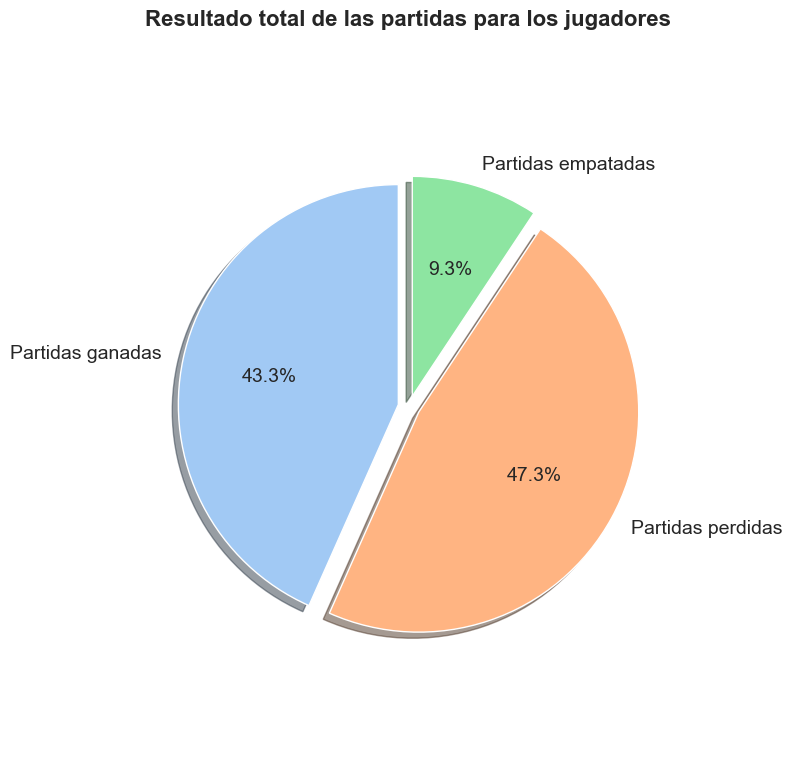

In [109]:
# Aplicamos estilo de seaborn a matplotlib
sns.set_theme(style="white")

# Datos
labels = ['Partidas ganadas', 'Partidas perdidas', 'Partidas empatadas']
sizes = [total_wins_per, total_losses_per, total_push_per]
colors = sns.color_palette("pastel")[0:3]  # colores suaves y agradables
explode = (0.05, 0.05, 0.05)  # separación para cada porción

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14}
)
plt.title('Resultado total de las partidas para los jugadores', fontsize=16, weight='bold')
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()


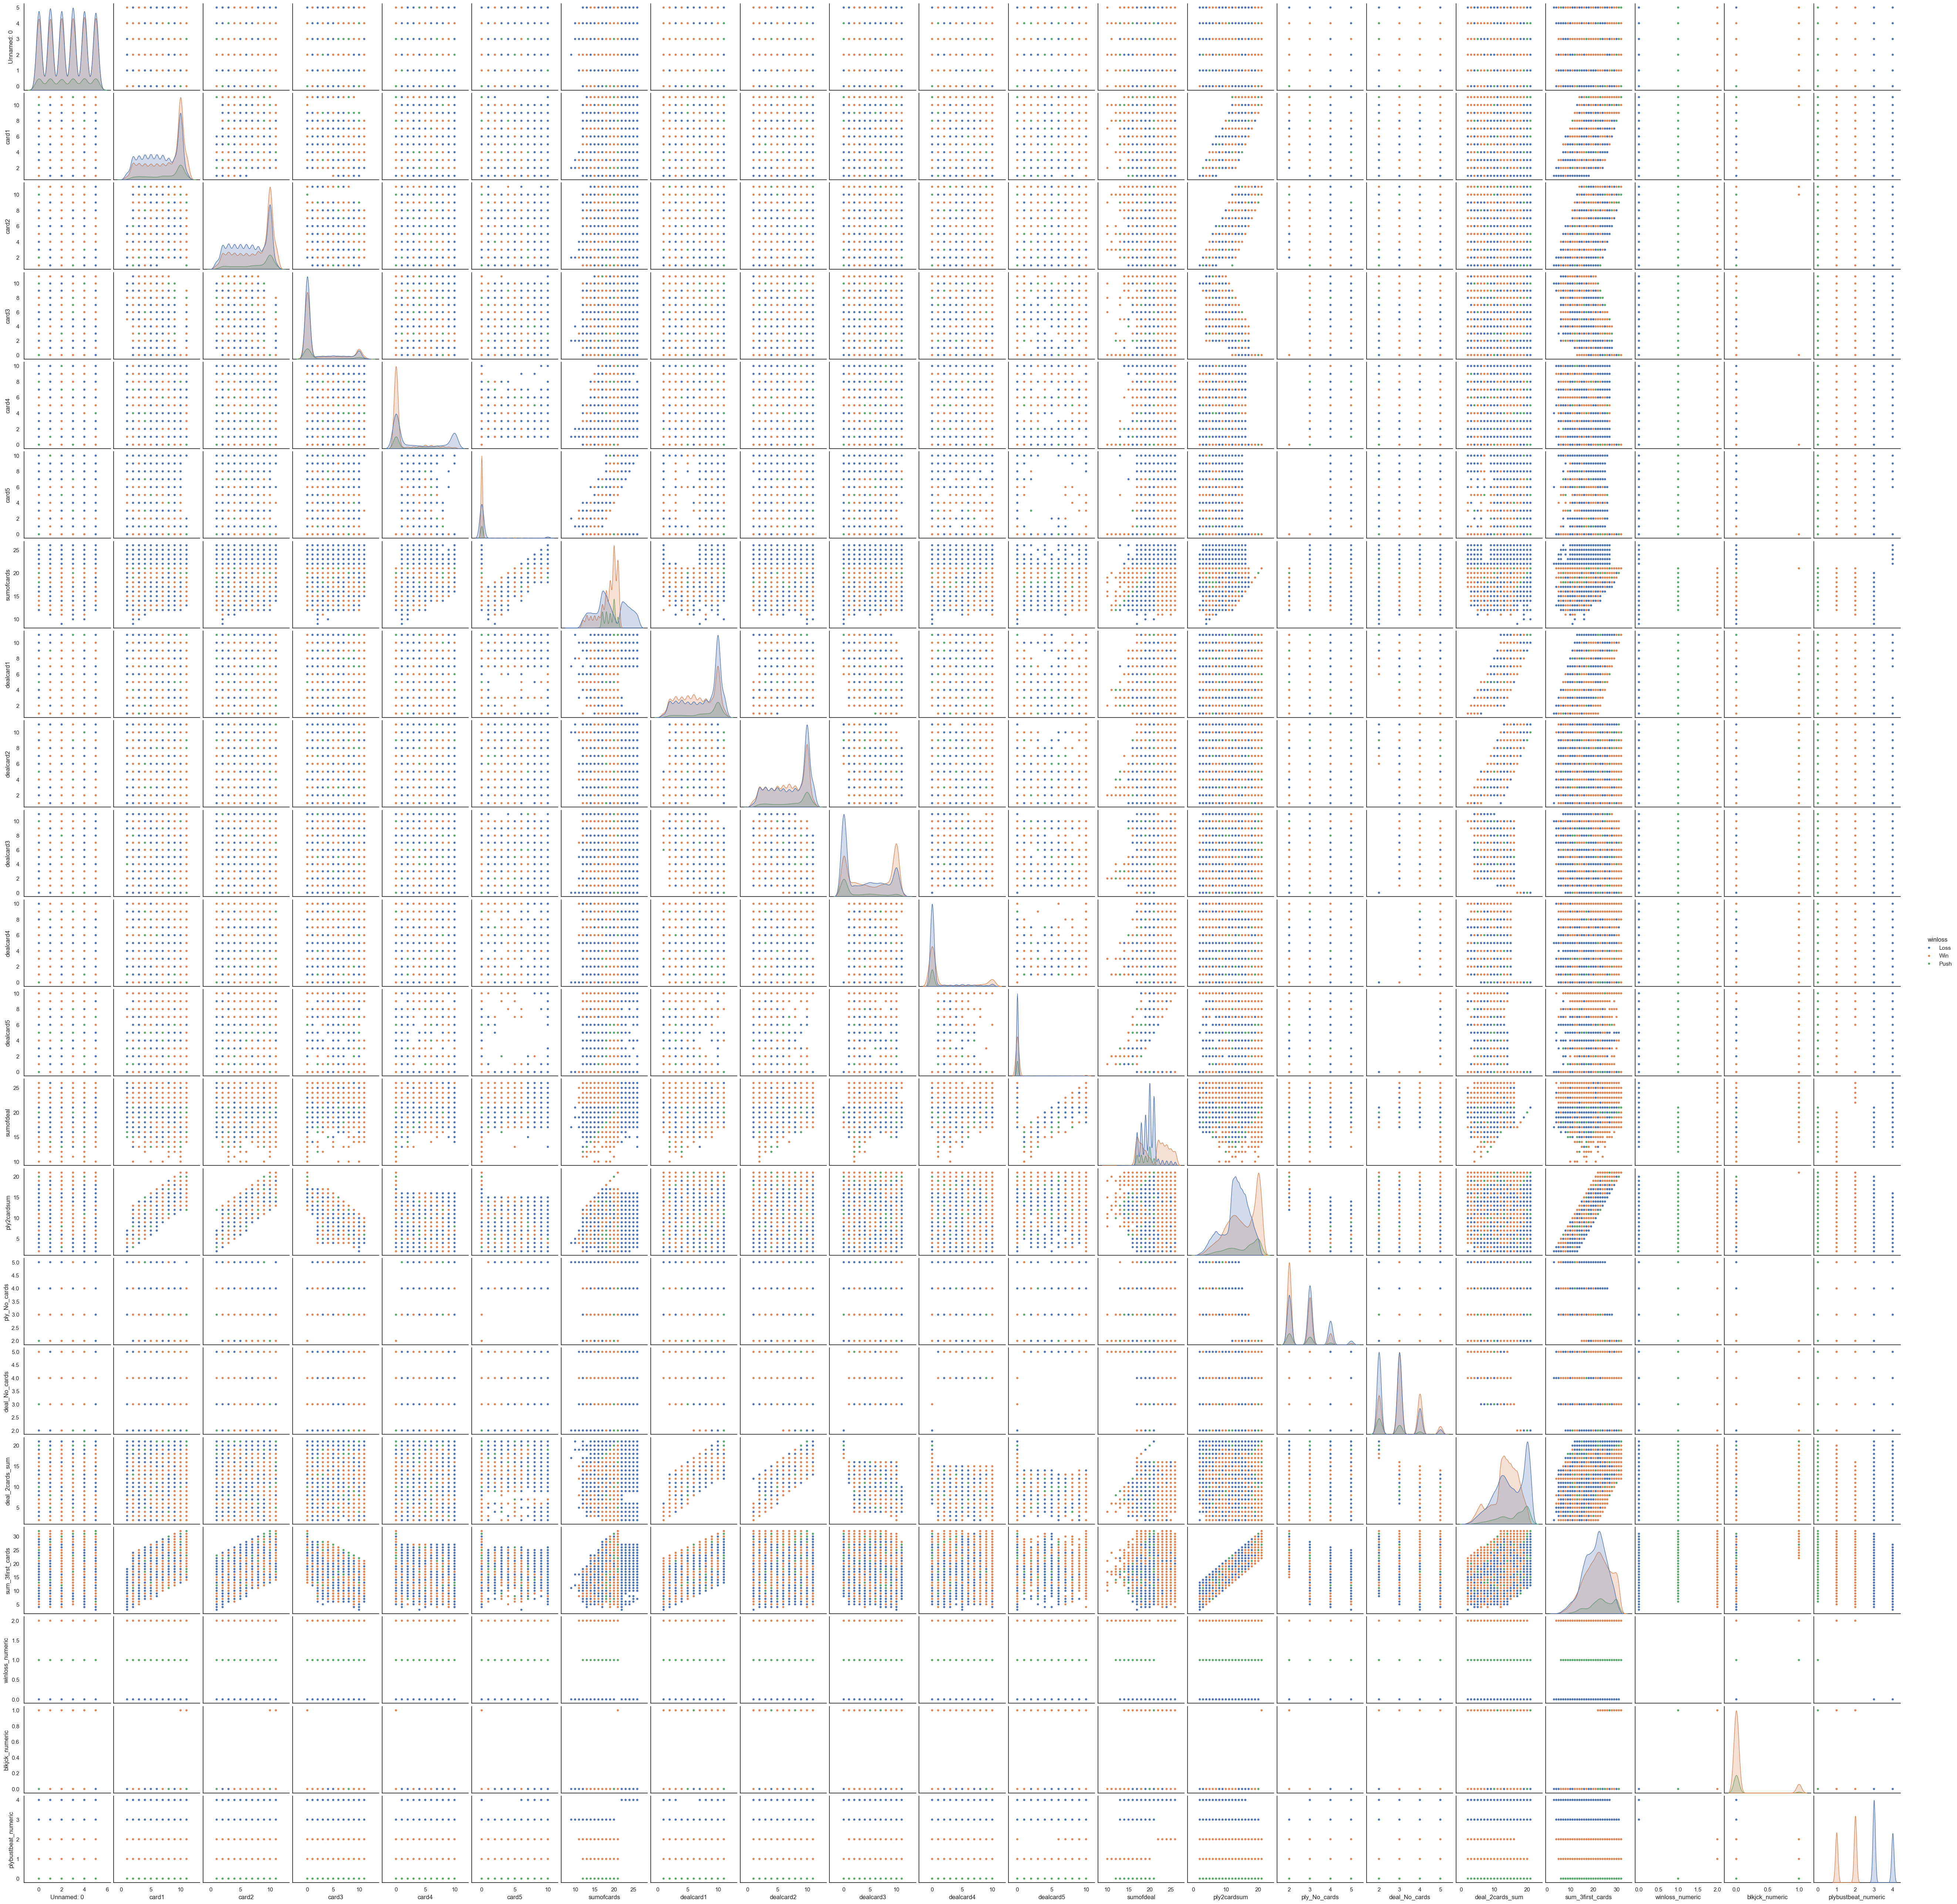

In [110]:
sns.pairplot(ds_blackjack.sample(frac=0.5, random_state=42), plot_kws={'s': 20, 'alpha': 1}, hue="winloss") # aññadir despues de black jack: .sample(frac=0.5, random_state=42)

<Axes: >

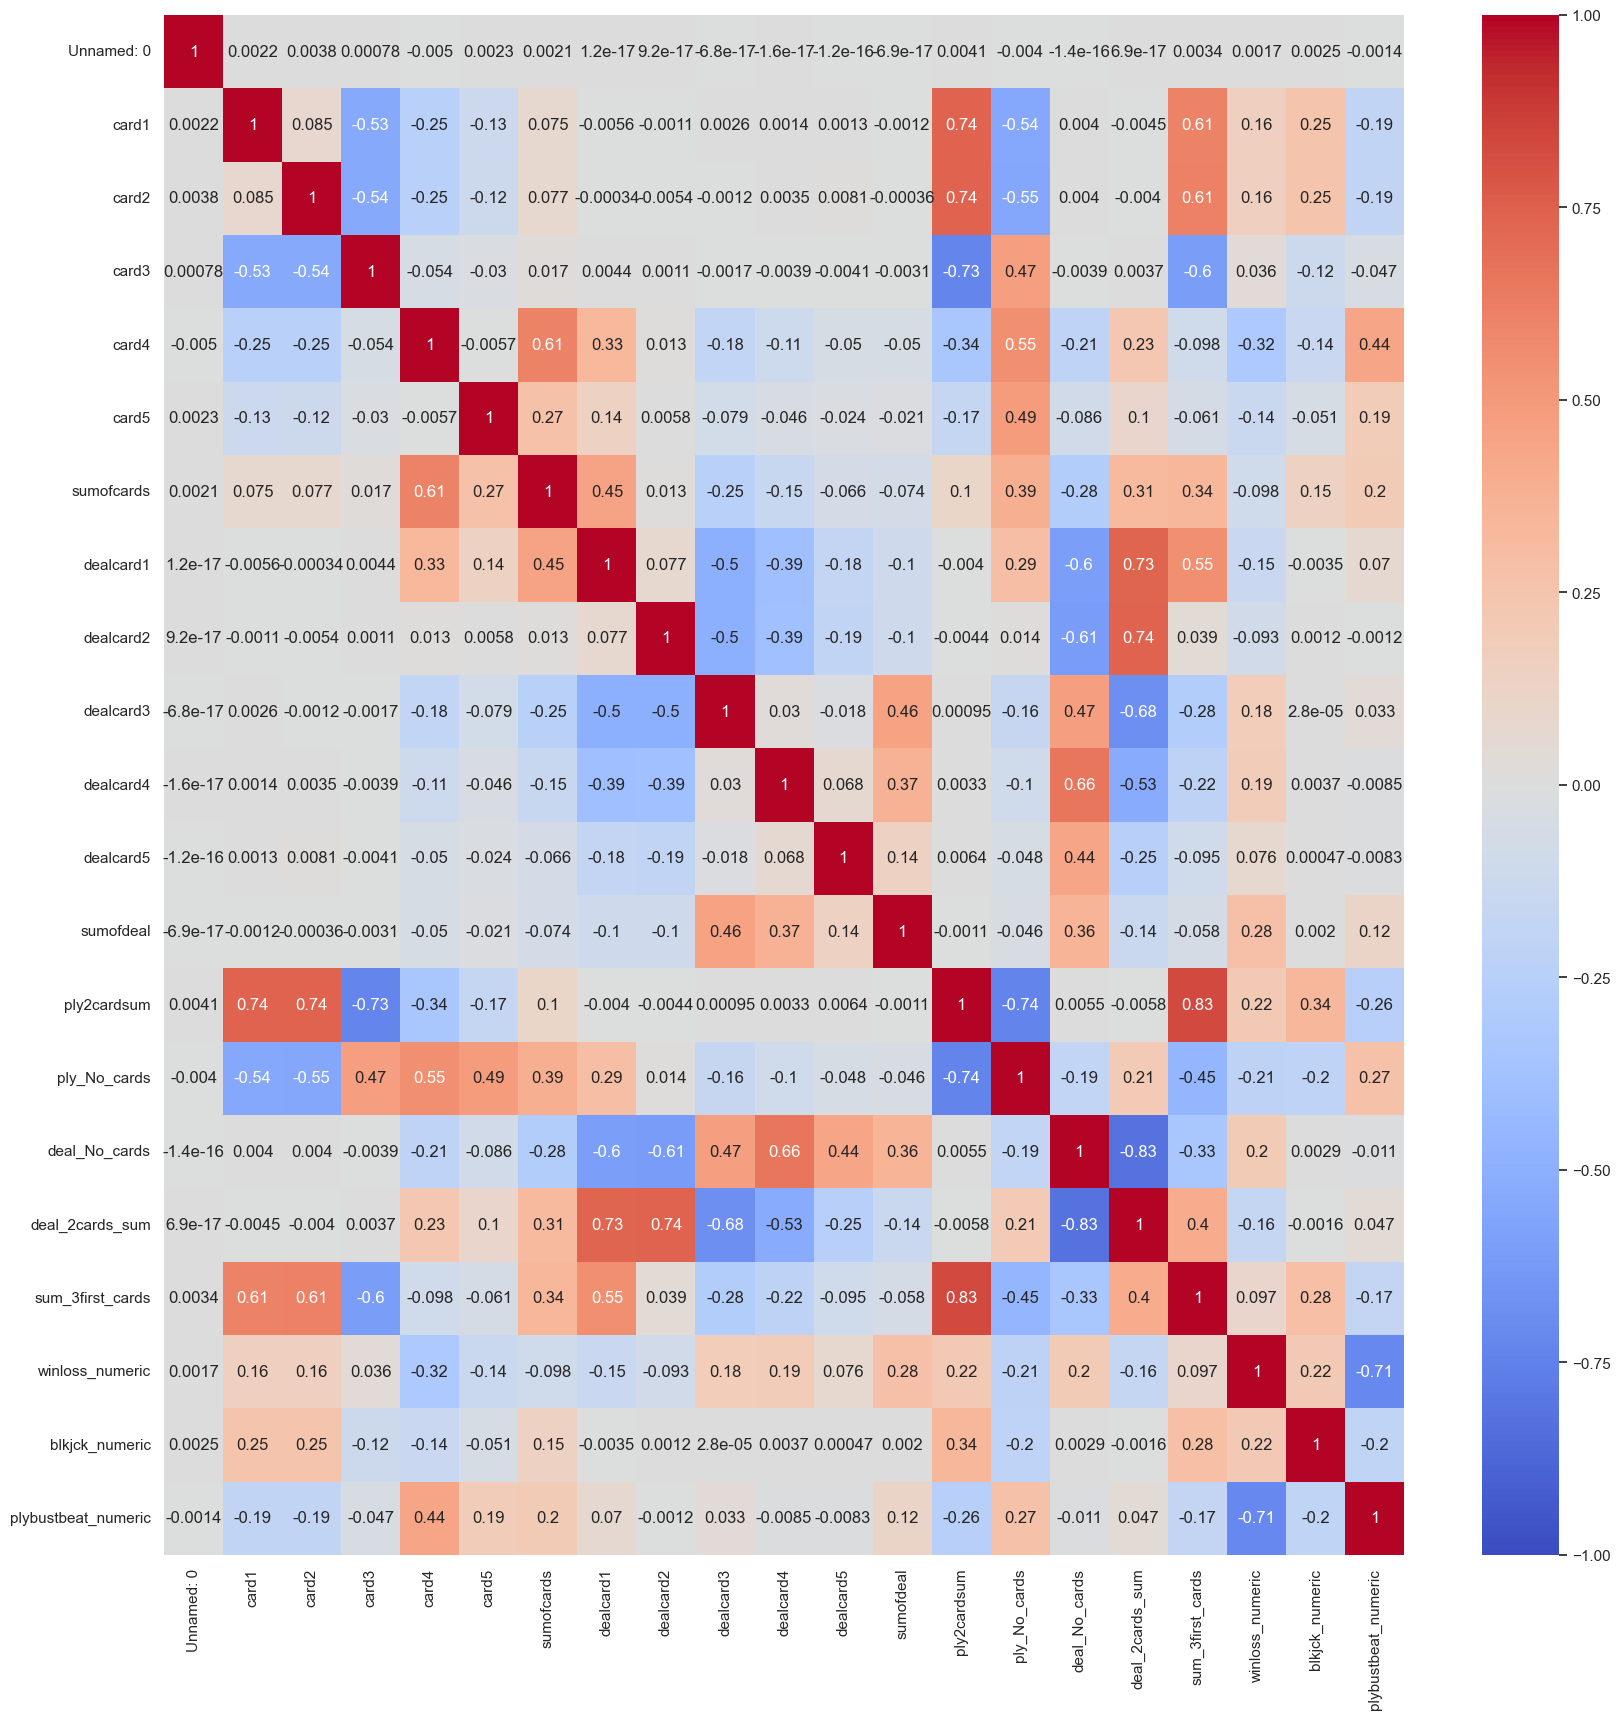

In [111]:
plt.figure(figsize=(20, 20))
sns.heatmap(ds_blackjack.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1, vmax=1)